In [21]:
!pip install xgboost
!pip install imbalanced-learn
#Installing ucimlrepo package
!pip install ucimlrepo

In [163]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats  # Import the stats module for ANOVA
from sklearn.feature_selection import chi2, SelectKBest
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, accuracy_score, precision_score, recall_score

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier



In [164]:
#Fetching UCI repositories 
from ucimlrepo import fetch_ucirepo, list_available_datasets
#List of UCI repositories with ID
list_available_datasets()


-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [165]:
# fetch dataset and create dataframe
adult = fetch_ucirepo(id=2) 
adultDataFrame = adult.data.original
adultDataFrame

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [166]:
originaldataset = adultDataFrame
originaldataset['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [167]:
# adultDataFrame1.replace('?', np.nan, inplace=True)
# # Clean values in income column
# adultDataFrame1['income'].replace('<=50K.', '<=50K',inplace = True)
# adultDataFrame1['income'].replace('>50K.', '>50K',inplace = True)

# print("Duplicate Rows:\n", adultDataFrame1.duplicated().sum())
# duplicates  = adultDataFrame1[adultDataFrame1.duplicated()]
# duplicates
# duplicates[duplicates['fnlwgt']== 308144]
# #Check and drop duplicates
# adult_cleanedData = adultDataFrame1.drop_duplicates(inplace=False)

In [168]:
# 2. Data Cleaning
print("Duplicate Rows:\n", adultDataFrame.duplicated().sum())
# Identify rows where all values are NaN
# Identify rows where all values are NaN
blank_rows = adultDataFrame.isnull().all(axis=1)

# Print the count of blank rows
print("Blank Rows (All NaN values):", blank_rows.sum())
# Handling missing values ('?' is treated as missing in this dataset)
adultDataFrame.replace('?', np.nan, inplace=True)

#Check and drop duplicates
# adult_cleanedData = adultDataFrame1.drop_duplicates(inplace=False)

 

# Clean values in income column
adultDataFrame['income'].replace('<=50K.', '<=50K',inplace = True)
adultDataFrame['income'].replace('>50K.', '>50K',inplace = True)
#adult_cleanedData
adultDataFrame['income'].value_counts()

print("Duplicate Rows:\n", adultDataFrame.duplicated().sum())
duplicates  = adultDataFrame[adultDataFrame.duplicated()]
#duplicates
# #Check and drop duplicates
#adult_cleanedData = adultDataFrame.drop_duplicates(inplace=False)
adultDataFrame.drop_duplicates(inplace=True)

adultDataFrame

Duplicate Rows:
 29
Blank Rows (All NaN values): 0
Duplicate Rows:
 52


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [169]:
# adultDataFrame['education_new'] = np.where(np.isin(adultDataFrame.education,['Preschool','1st-4th','5th-6th']),'Elementary',
#                            np.where(np.isin(adultDataFrame.education,['7th-8th']),'Middle-School',
#                            np.where(np.isin(adultDataFrame.education,['9th','10th','11th','12th']),'High-School',adultDataFrame.education)))
# adultDataFrame[['education_new','education']].value_counts()

adultDataFrame['education_new'] = np.where(np.isin(adultDataFrame.education,['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th']),
                                    'Not HS-grad',adultDataFrame.education)

In [170]:
adultDataFrame.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,education_new
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Bachelors
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Bachelors
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,HS-grad
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Not HS-grad
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Bachelors


In [171]:
# Define bins and labels for age categories
bins = [0, 13, 20, 35, 61, 100]  # Age intervals
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']  # Corresponding labels

# Use pd.cut to categorize the age into groups
adultDataFrame['age_group'] = pd.cut(adultDataFrame['age'], bins=bins, labels=labels, right=False)

# Display the DataFrame
print(adultDataFrame)

       age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2              

In [172]:
adultDataFrame['age_group'].value_counts()

age_group
Adult          24212
Young Adult    18473
Senior          3605
Teen            2500
Child              0
Name: count, dtype: int64

In [173]:
#Now drop the column which are not needed
adultDataFrame.drop(columns=['fnlwgt','education','education-num','age'], inplace=True)

In [174]:
adultDataFrame

,workclass,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,education_new,age_group
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Bachelors,Adult
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Bachelors,Adult
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,HS-grad,Adult
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Not HS-grad,Adult
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Bachelors,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,Private,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,Bachelors,Adult
48838,NaN,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K,HS-grad,Senior
48839,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,Bachelors,Adult
48840,Private,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,Bachelors,Adult


In [175]:
adultDataFrame.loc[adultDataFrame['workclass'] == 'Never-worked', 'hours-per-week'] = 0

In [176]:
adultDataFrame.loc[adultDataFrame['workclass'] == 'Never-worked']

,workclass,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,education_new,age_group
5361,Never-worked,Never-married,NaN,Own-child,White,Male,0,0,0,United-States,<=50K,Not HS-grad,Teen
10845,Never-worked,Divorced,NaN,Not-in-family,White,Male,0,0,0,United-States,<=50K,Not HS-grad,Young Adult
14772,Never-worked,Never-married,NaN,Own-child,White,Male,0,0,0,United-States,<=50K,Not HS-grad,Teen
20337,Never-worked,Never-married,NaN,Own-child,White,Female,0,0,0,United-States,<=50K,Not HS-grad,Teen
23232,Never-worked,Never-married,NaN,Own-child,Black,Male,0,0,0,United-States,<=50K,Some-college,Young Adult
32304,Never-worked,Married-civ-spouse,NaN,Wife,Black,Female,0,0,0,United-States,<=50K,HS-grad,Young Adult
32314,Never-worked,Never-married,NaN,Own-child,White,Male,0,0,0,United-States,<=50K,Some-college,Teen
41346,Never-worked,Never-married,NaN,Own-child,Black,Female,0,0,0,United-States,<=50K,Not HS-grad,Teen
44168,Never-worked,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,0,United-States,<=50K,HS-grad,Young Adult
46459,Never-worked,Never-married,NaN,Own-child,White,Male,0,0,0,United-States,<=50K,Not HS-grad,Teen


In [177]:
adultDataFrame[adultDataFrame['hours-per-week'] == 0]

,workclass,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,education_new,age_group
5361,Never-worked,Never-married,NaN,Own-child,White,Male,0,0,0,United-States,<=50K,Not HS-grad,Teen
10845,Never-worked,Divorced,NaN,Not-in-family,White,Male,0,0,0,United-States,<=50K,Not HS-grad,Young Adult
14772,Never-worked,Never-married,NaN,Own-child,White,Male,0,0,0,United-States,<=50K,Not HS-grad,Teen
20337,Never-worked,Never-married,NaN,Own-child,White,Female,0,0,0,United-States,<=50K,Not HS-grad,Teen
23232,Never-worked,Never-married,NaN,Own-child,Black,Male,0,0,0,United-States,<=50K,Some-college,Young Adult
32304,Never-worked,Married-civ-spouse,NaN,Wife,Black,Female,0,0,0,United-States,<=50K,HS-grad,Young Adult
32314,Never-worked,Never-married,NaN,Own-child,White,Male,0,0,0,United-States,<=50K,Some-college,Teen
41346,Never-worked,Never-married,NaN,Own-child,Black,Female,0,0,0,United-States,<=50K,Not HS-grad,Teen
44168,Never-worked,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,0,United-States,<=50K,HS-grad,Young Adult
46459,Never-worked,Never-married,NaN,Own-child,White,Male,0,0,0,United-States,<=50K,Not HS-grad,Teen


In [178]:
# Cap 'hours-per-week' at 80adultDataFrame
adultDataFrame['hours-per-week'] = adultDataFrame['hours-per-week'].apply(lambda x: 80 if x > 80 else x)

# Verify the changes
print(adultDataFrame['hours-per-week'].unique())

[40 13 16 45 50 80 30 35 60 20 52 44 15 25 38 43 55 48 58 32 70  2 22 56
 41 28 36 24 46 42 12 65  1 10 34 75 33 54  8  6 64 19 18 72  5  9 47 37
 21 26 14  4 59  7 53 39 62 57 78 66 11 49  3 17 68 27 31 51 77  0 63 23
 73 29 67 76 61 74 79 69]


## **Encoding** ##

In [179]:
# #encoding values 
# from sklearn.preprocessing import LabelEncoder
# encode_columns = ['age_group','workclass','occupation','marital-status','education_new','relationship','race','sex','native-country','income']

# for column in encode_columns:
#      adultDataFrame[column+'_enc'] = LabelEncoder().fit_transform(adultDataFrame[column])

In [180]:
adultDataFrame['workclass'].isnull().sum()


2795

In [181]:
adultDataFrame['occupation'].isnull().sum()

2805

## **Imputing the missing values** ##
**(because duirng oversampling SMOTE require a complete dataset with no missing values to create synthetic samples accurately)**

**Imputing the missing values for workclass**

In [182]:
# List of columns to encode
encode_columns = ['age_group', 'workclass', 'occupation', 'marital-status', 'education_new',
                  'relationship', 'race', 'sex', 'native-country', 'income']

# Apply LabelEncoder to the columns that need to be encoded
label_encoders = {}
for column in encode_columns:
    le = LabelEncoder()
    adultDataFrame[column + '_enc'] = le.fit_transform(adultDataFrame[column])
    label_encoders[column] = le  # Save the encoder for potential reverse mapping if needed

# Drop the original non-encoded columns
adultDataFrame_encoded = adultDataFrame.drop(columns=encode_columns)

# Function to impute missing values for a specified column using RandomForestClassifier


def impute_column(df, target_col, random_state=42):
    # Separate rows with and without missing values
    df_missing = df[df[target_col].isnull()]
    df_not_missing = df[df[target_col].notnull()]

    # Ensure there are non-empty samples for imputation
    if df_missing.empty:
        print(f"No missing values to impute for {target_col}")
        return df

    # Define features and target, excluding the target column itself
    X = df_not_missing.drop(columns=[target_col])  # Features (exclude the target column)
    y = df_not_missing[target_col]  # Target variable (the column to impute)

    # Ensure there are non-empty samples for training
    if X.empty or y.empty:
        raise ValueError(f"No valid training samples for {target_col} imputation.")

    # Split the non-missing data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Initialize and train the Random Forest Classifier
    rf = RandomForestClassifier(random_state=random_state)
    rf.fit(X_train, y_train)

    # Use the trained model to predict missing values
    X_missing = df_missing.drop(columns=[target_col])  # Features for rows with missing values

    if X_missing.empty:
        raise ValueError(f"No valid samples with missing values for {target_col} imputation.")

    df_missing[target_col] = rf.predict(X_missing)

    # Combine the imputed and non-missing data back together
    df_imputed = pd.concat([df_not_missing, df_missing])

    return df_imputed

# Apply the imputation for both 'workclass_enc' and 'occupation_enc'
adultDataFrame_encoded = impute_column(adultDataFrame_encoded, 'workclass_enc')
adultDataFrame_encoded = impute_column(adultDataFrame_encoded, 'occupation_enc')

# Display the imputed DataFrame and the value counts for verification
print(adultDataFrame_encoded['workclass_enc'].value_counts())
print(adultDataFrame_encoded['occupation_enc'].value_counts())

No missing values to impute for workclass_enc
No missing values to impute for occupation_enc
workclass_enc
3    33860
5     3861
1     3136
8     2795
6     1981
4     1694
0     1432
7       21
2       10
Name: count, dtype: int64
occupation_enc
9     6165
2     6102
3     6082
0     5606
11    5501
7     4919
6     3017
14    2805
13    2355
5     2071
4     1485
12    1445
10     982
8      240
1       15
Name: count, dtype: int64


In [183]:
adultDataFrame_encoded

,capital-gain,capital-loss,hours-per-week,age_group_enc,workclass_enc,occupation_enc,marital-status_enc,education_new_enc,relationship_enc,race_enc,sex_enc,native-country_enc,income_enc
0,2174,0,40,0,6,0,4,2,1,4,1,38,0
1,0,0,13,0,5,3,2,2,0,4,1,38,0
2,0,0,40,0,3,5,0,4,1,4,1,38,0
3,0,0,40,0,3,5,2,6,0,2,1,38,0
4,0,0,40,3,3,9,2,2,5,2,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,36,0,3,9,0,2,1,4,0,38,0
48838,0,0,40,1,8,14,6,4,2,2,1,38,0
48839,0,0,50,0,3,9,2,2,0,4,1,38,0
48840,5455,0,40,0,3,0,0,2,3,1,1,38,0


In [184]:
adultDataFrame_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   capital-gain        48790 non-null  int64
 1   capital-loss        48790 non-null  int64
 2   hours-per-week      48790 non-null  int64
 3   age_group_enc       48790 non-null  int32
 4   workclass_enc       48790 non-null  int32
 5   occupation_enc      48790 non-null  int32
 6   marital-status_enc  48790 non-null  int32
 7   education_new_enc   48790 non-null  int32
 8   relationship_enc    48790 non-null  int32
 9   race_enc            48790 non-null  int32
 10  sex_enc             48790 non-null  int32
 11  native-country_enc  48790 non-null  int32
 12  income_enc          48790 non-null  int32
dtypes: int32(10), int64(3)
memory usage: 3.4 MB


In [185]:
adultDataFrame_encoded['income_enc'].value_counts()

income_enc
0    37109
1    11681
Name: count, dtype: int64

In [186]:
37109+11681

48790

## **Oversampling to balance the data(>50k)** ##
**class 0 is <=50k and class 1 is >50k**

In [187]:
# Assuming 'income' is the target variable with values '>50K' and '<=50K'
X = adultDataFrame_encoded.drop(columns=['income_enc'])  # Features
y = adultDataFrame_encoded['income_enc']  # Target variable

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution after oversampling
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts())

# Convert the resampled data back into a DataFrame
X_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_train_resampled, columns=['income_enc'])

# Combine the features and target into a single DataFrame
adultDataFrame_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)


Before SMOTE: income_enc
0    29687
1     9345
Name: count, dtype: int64
After SMOTE: income_enc
1    29687
0    29687
Name: count, dtype: int64


In [188]:
adultDataFrame_resampled

,capital-gain,capital-loss,hours-per-week,age_group_enc,workclass_enc,occupation_enc,marital-status_enc,education_new_enc,relationship_enc,race_enc,sex_enc,native-country_enc,income_enc
0,0,0,40,0,3,2,2,1,0,4,1,38,1
1,0,0,40,0,3,3,4,8,3,4,0,38,0
2,0,0,40,0,1,0,4,4,3,4,0,38,0
3,0,0,48,0,1,13,4,0,1,4,1,38,0
4,0,0,55,0,3,9,2,2,0,4,1,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59369,8614,0,40,0,3,2,4,2,1,4,1,38,1
59370,0,2559,50,0,3,3,5,5,3,4,0,38,1
59371,0,0,38,0,5,9,2,7,0,4,1,38,1
59372,0,0,58,0,5,9,2,6,0,4,1,38,1


In [189]:
adultDataFrame_resampled['income_enc'].isnull().sum()

0

In [190]:


# Assuming 'categorical_features' contains the names of encoded categorical columns
categorical_features = ['workclass_enc', 'education_new_enc', 'marital-status_enc', 
                        'occupation_enc', 'relationship_enc', 'native-country_enc', 
                        'race_enc', 'sex_enc']

# Select the data (features) for these categorical columns
X_categorical = adultDataFrame_resampled[categorical_features]  # Extract the actual feature data
target = adultDataFrame_resampled['income_enc']  # Target variable

# Apply Chi-Square test
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X_categorical, target)

# Get Chi-Square scores for each feature
chi2_scores = pd.DataFrame({
    'Feature': categorical_features,
    'Chi2 Score': chi2_selector.scores_
})

# Print Chi-Square Test Results
print("Chi-Square Test Results:")
print(chi2_scores.sort_values(by='Chi2 Score', ascending=False))


Chi-Square Test Results:
              Feature    Chi2 Score
4    relationship_enc  14105.594168
2  marital-status_enc   3309.943733
1   education_new_enc   1890.163746
7             sex_enc    995.574672
0       workclass_enc    541.535413
6            race_enc     72.362611
5  native-country_enc     46.182681
3      occupation_enc      2.276507


In [191]:
# 2. Prepare data for ANOVA Test (Continuous Features)
continuous_features = ['age_group_enc', 'hours-per-week', 'capital-gain', 'capital-loss']

# Perform One-Way ANOVA test between continuous features and target
anova_results = {}
for feature in continuous_features:
    # Perform ANOVA
    group_data = [adultDataFrame_resampled[adultDataFrame_resampled['income_enc'] == income_class][feature] 
                  for income_class in target.unique()]
    f_val, p_val = stats.f_oneway(*group_data)
    
    anova_results[feature] = {'F-Statistic': f_val, 'P-Value': p_val}

# Convert ANOVA results to DataFrame and display
anova_df = pd.DataFrame(anova_results).T
print("\nANOVA Test Results:")
print(anova_df)


ANOVA Test Results:
                F-Statistic        P-Value
age_group_enc   8562.069230   0.000000e+00
hours-per-week  5125.924132   0.000000e+00
capital-gain    2032.736611   0.000000e+00
capital-loss    1191.342350  1.707768e-258


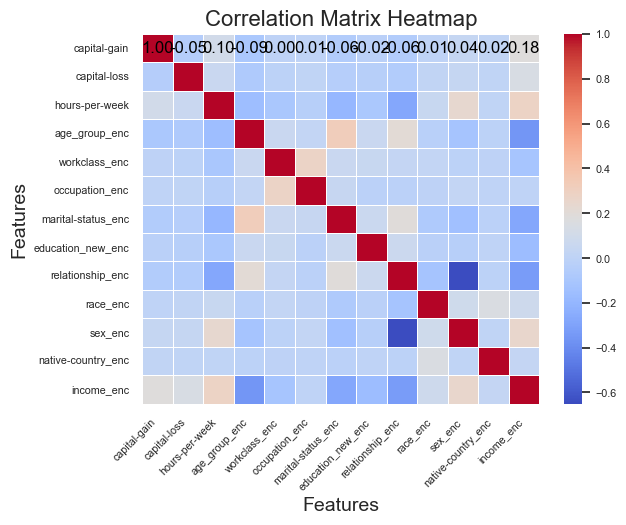

In [192]:
# Compute the correlation matrix
correlation_matrix = adultDataFrame_resampled.corr()
# Create the heatmap
#plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, 
            annot_kws={"size": 12, "color": "black"},  # Annotation options
            fmt=".2f") 

# Set the axis labels and title
plt.title("Correlation Matrix Heatmap", fontsize=16)  # Set title and size
plt.xlabel("Features", fontsize=14)  # X-axis label
plt.ylabel("Features", fontsize=14)  # Y-axis label

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for readability

# Show the heatmap
plt.show()

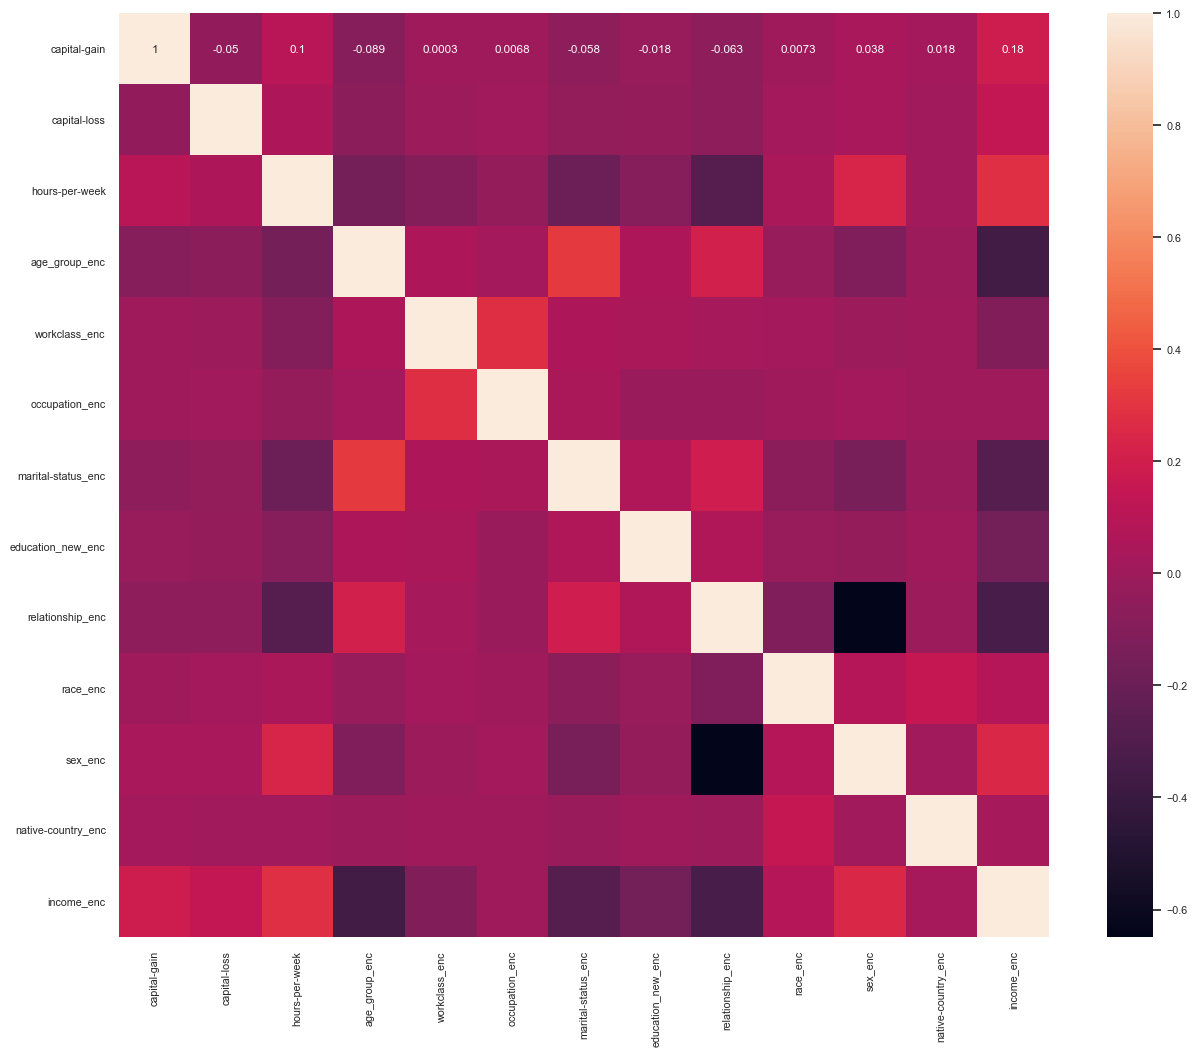

In [193]:


#sns.heatmap(correlation_matrix.corr());
correlation_matrix = adultDataFrame_resampled.corr()
plt.figure(figsize=(15, 12))
sns.set(font_scale=0.7)
sns.heatmap(correlation_matrix, annot=True)
plt.show()





In [194]:
# # We considered values greater than +
#  or - 0.15
# native country
# race
# occupation
# capital loss

In [195]:
# # Function to load and preprocess data
# def load_and_preprocess_data(dataframe):
#     label_encoder = LabelEncoder()
#     for column in dataframe.select_dtypes(include='object').columns:
#         dataframe[column] = label_encoder.fit_transform(dataframe[column])
#    # X = dataframe.drop('income', axis=1)
#     X = adultDataFrame[['workclass', 'education_new', 'marital-status', 'relationship','sex','age', 'hours-per-week', 'capital-gain']]
#     y = dataframe['income']
#     return X, y


# # Function to scale data for specific models
# def scale_data(X_train, X_test):
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
#     return X_train_scaled, X_test_scaled

# # Function to train and evaluate models
# def train_and_evaluate_models(X_train, X_test, y_train, y_test, scale_models=[]):
#     models = {
#         'Logistic Regression': LogisticRegression(),
#         'Decision Tree': DecisionTreeClassifier(),
#         'Random Forest': RandomForestClassifier(),
#         'XGB Boosting': XGBClassifier(),
#         'SVM': SVC(),
#         'Naive Bayes': GaussianNB(),
#         'K-Nearest Neighbors': KNeighborsClassifier()
#     }
    
#     results = {}

#     for model_name, model in models.items():
#         # Scale input if the model is in the list of scale_models
#         if model_name in scale_models:
#             model.fit(X_train_scaled, y_train)
#             y_pred = model.predict(X_test_scaled)
#         else:
#             model.fit(X_train, y_train)
#             y_pred = model.predict(X_test)
        
#         accuracy = accuracy_score(y_test, y_pred)
#         precision = precision_score(y_test, y_pred)
        
#         # Store the results
#         results[model_name] = {
#             'Accuracy': accuracy,
#             'Precision': precision
#         }

#         # Print classification report
#         print(f"{model_name} Classification Report:\n")
#         print(classification_report(y_test, y_pred))
#         print('-' * 60)

#     return results

# # Function to display results
# def display_results(results):
#     results_df = pd.DataFrame(results).T
#     print("\nOverall Model Performance:")
#     print(results_df)

# # Main function to execute the process
# def main(adultDataFrame):
#     X, y = load_and_preprocess_data(adultDataFrame)
    
#     # Split data
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
#     # Scale the data for models that require it (SVM, KNN)
#     global X_train_scaled, X_test_scaled
#     X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

#     # Evaluate models
#     scale_models = ['SVM', 'K-Nearest Neighbors']
#     results = train_and_evaluate_models(X_train, X_test, y_train, y_test, scale_models=scale_models)
    
#     # Display the results
#     display_results(results)


# main(adultDataFrame)


In [203]:
# Function to load and preprocess data
# ALl 12 features included
X = adultDataFrame_resampled[['workclass_enc', 'education_new_enc', 'marital-status_enc', 
                        'occupation_enc', 'relationship_enc', 'native-country_enc', 
                        'race_enc', 'sex_enc','capital-gain','capital-loss','age_group_enc', 'hours-per-week']]
# features  included as per chi- square and annova test
# X = adultDataFrame_resampled[['workclass_enc', 'education_new_enc', 'marital-status_enc', 
#                         'occupation_enc', 'relationship_enc',  
#                          'sex_enc','capital-gain','age_group_enc', 'hours-per-week']]
#Removing last 3 from chi square and 1 from annova test result
# X = adultDataFrame_resampled[['workclass_enc', 'education_new_enc', 'marital-status_enc', 
#                          'relationship_enc',  
#                          'sex_enc','capital-gain','age_group_enc', 'hours-per-week']]

# Removing values on the basis of heatmap
# X = adultDataFrame_resampled[['workclass_enc', 'education_new_enc', 'marital-status_enc', 
#                          'relationship_enc','sex_enc','capital-gain','age_group_enc', 'hours-per-week']]

y = adultDataFrame_resampled['income_enc']
   

# Function to scale data for specific models
def scale_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Function to train and evaluate models
def train_and_evaluate_models(X_train, X_test, y_train, y_test, scale_models=[]):
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'XGB Boosting': XGBClassifier(classifier__max_depth= 20, classifier__min_samples_split= 2, classifier__n_estimators= 50),
        #'SVM': SVC(),
        'Neural Network':MLPClassifier(),
        'Naive Bayes': GaussianNB(),
        'K-Nearest Neighbors': KNeighborsClassifier()
    }
    
    results = {}

    for model_name, model in models.items():
        # Scale input if the model is in the list of scale_models
        if model_name in scale_models:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        
        # Store the results
        results[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision
        }

        # Print classification report
        print(f"{model_name} Classification Report:\n")
        print(classification_report(y_test, y_pred))
        print('-' * 60)

    return results

# Function to display results
def display_results(results):
    results_df = pd.DataFrame(results).T
    print("\nOverall Model Performance:")
    print(results_df)

# Main function to execute the process
def main(adultDataFrame):
   
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Scale the data for models that require it (SVM, KNN)
    global X_train_scaled, X_test_scaled
    X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

    # Evaluate models
    #scale_models = ['SVM', 'K-Nearest Neighbors']
    scale_models = ['K-Nearest Neighbors']
    results = train_and_evaluate_models(X_train, X_test, y_train, y_test, scale_models=scale_models)
    
    # Display the results
    display_results(results)


main(adultDataFrame_resampled)


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      8944
           1       0.73      0.78      0.76      8869

    accuracy                           0.75     17813
   macro avg       0.75      0.75      0.75     17813
weighted avg       0.75      0.75      0.75     17813

------------------------------------------------------------
Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      8944
           1       0.83      0.88      0.85      8869

    accuracy                           0.85     17813
   macro avg       0.85      0.85      0.85     17813
weighted avg       0.85      0.85      0.85     17813

------------------------------------------------------------
Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      

### output based on all 12 features
 Overall Model Performance:
                     Accuracy  Precision
Logistic Regression  0.745798   0.733572
Decision Tree        0.855726   0.839236
Random Forest        0.871526   0.854264
XGB Boosting         0.872367   0.853671
Neural Network       0.794207   0.732947
Naive Bayes          0.661811   0.865026
K-Nearest Neighbors  0.837517   0.819396 

### With startify sampling and 12 features
Overall Model Performance:
                     Accuracy  Precision
Logistic Regression  0.748274   0.730911
Decision Tree        0.850109   0.828302
Random Forest        0.867681   0.843968
XGB Boosting         0.864986   0.845373
Neural Network       0.794251   0.752327
Naive Bayes          0.648066   0.850216
K-Nearest Neighbors  0.827935   0.800663

### output based on feature from chi square and annova test
Overall Model Performance:
                     Accuracy  Precision
Logistic Regression  0.739971   0.728722
Decision Tree        0.844745   0.830245
Random Forest        0.856342   0.839856
XGB Boosting         0.862113   0.844623
Neural Network       0.803171   0.773712
Naive Bayes          0.680244   0.866637
K-Nearest Neighbors  0.832250   0.825476 

### output based on features from heatmap
Overall Model Performance:
                     Accuracy  Precision
Logistic Regression  0.738682   0.729129
Decision Tree        0.838301   0.826171
Random Forest        0.845473   0.825905
XGB Boosting         0.852084   0.832720
Neural Network       0.805749   0.789973
Naive Bayes          0.678507   0.866863
K-Nearest Neighbors  0.827600   

### With statify sampling and heatmap features
Overall Model Performance:
                     Accuracy  Precision
Logistic Regression  0.740414   0.725678
Decision Tree        0.835850   0.815050
Random Forest        0.843710   0.820229
XGB Boosting         0.848650   0.821410
Neural Network       0.803121   0.772959
Naive Bayes          0.656880   0.866915
K-Nearest Neighbors  0.813226   0.8124010.815902

In [198]:
from sklearn.model_selection import GridSearchCV
# # Define the model
# rf = RandomForestClassifier()
# # Define hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [5, 10, 20, None],
#     'min_samples_split': [2, 10, 20],
#     'min_samples_leaf': [1, 5, 10],
#     'criterion': ['gini', 'entropy']
# }
# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)
# # Best parameters and score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# print(f"Best Parameters: {best_params}")
# print(f"Best Score: {best_score}")



# 'income' is the target variable and other features are in 'X'
X = adultDataFrame_resampled.drop(columns=['income_enc'])  # Features
y = adultDataFrame_resampled['income_enc']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline([
   # ('classifier', RandomForestClassifier())
     ('classifier',XGBClassifier())
])

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best Score: 0.8744183376643525


Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best Score: 0.873821439932452


In [199]:
# Hyperparameter tuning using GridSearchCV
# Prepare features and target variable
X = adultDataFrame_resampled.drop(columns=['income_enc'])  # Features
y = adultDataFrame_resampled['income_enc']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of classifiers and their corresponding parameter grids
models_param_grids = [
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    {
        'classifier': [XGBClassifier()],
        'classifier__n_estimators': [50, 100, 150, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 4, 5],
        'classifier__min_child_weight': [1,2,3,4,5]
    },    
#     {
#         'classifier': [SVC()],
#         'classifier__C': [0.1, 1, 10],
#         'classifier__kernel': ['linear', 'rbf']
#     },
    {
        'classifier': [LogisticRegression(max_iter=500)],
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear', 'lbfgs']
    },
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    {
        'classifier': [MLPClassifier(max_iter=500)],
        'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'classifier__activation': ['relu', 'tanh'],
        'classifier__solver': ['adam', 'sgd'],
        'classifier__alpha': [0.0001, 0.001]
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']
    }
]

# Loop through models and perform hyperparameter tuning
best_models = []
for param_grid in models_param_grids:
    pipeline = Pipeline([
        ('classifier', param_grid['classifier'][0])
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Best model and parameters for the current classifier
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_model = grid_search.best_estimator_
    
    print(f"Model: {param_grid['classifier'][0].__class__.__name__}")
    print(f"Best Parameters: {best_params}")
    print(f"Best Score (Accuracy): {best_score:.4f}")
    
    # Save the best model from each classifier
    best_models.append((best_model, best_score))

# Evaluate the best models on the test set
for model, score in best_models:
    y_pred = model.predict(X_test)
    
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
#     test_recall = recall_score(y_test, y_pred)
#     test_f1 = f1_score(y_test, y_pred)
    
    classifier_name = model.named_steps['classifier'].__class__.__name__
    print(f"Metrics for {classifier_name}:")
    print(f"  Test Accuracy: {test_accuracy:.4f}")
    print(f"  Precision: {test_precision:.4f}")
#     print(f"  Recall: {test_recall:.4f}")
#     print(f"  F1 Score: {test_f1:.4f}")
    
#     print("Confusion Matrix:")
#     print(confusion_matrix(y_test, y_pred))
    
#     print("\nClassification Report:")
#     print(classification_report(y_test, y_pred))
#     print("-" * 40)
 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Model: RandomForestClassifier
Best Parameters: {'classifier': RandomForestClassifier(min_samples_split=5, n_estimators=200), 'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best Score (Accuracy): 0.8690
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Model: XGBClassifier
Best Parameters: {'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_c

In [ ]:
# Model: LogisticRegression
# Best Parameters: {'classifier': LogisticRegression(max_iter=500), 'classifier__C': 1, 'classifier__solver': 'liblinear'}
# Best Score (Accuracy): 0.8065
# Fitting 5 folds for each of 9 candidates, totalling 45 fits
# Model: DecisionTreeClassifier
# Best Parameters: {'classifier': DecisionTreeClassifier(), 'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
# Best Score (Accuracy): 0.8540
# Metrics for RandomForestClassifier:
#   Test Accuracy: 0.8598
#   Precision: 0.7687
# Metrics for XGBClassifier:
#   Test Accuracy: 0.8700
#   Precision: 0.7736
# Metrics for LogisticRegression:
#   Test Accuracy: 0.8007
#   Precision: 0.7296
# Metrics for DecisionTreeClassifier:
#   Test Accuracy: 0.8494
#   Precision: 0.7551

In [ ]:
# Hyperparameter tuning using RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# Prepare features and target variable
X = adultDataFrame_resampled.drop(columns=['income_enc'])  # Features
y = adultDataFrame_resampled['income_enc']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of classifiers and their corresponding random search parameter distributions
models_param_distributions = [
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': randint(50, 200),
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': randint(2, 10)
    },
    {
        'classifier': [XGBClassifier()],
        'classifier__n_estimators': randint(50, 200),
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': randint(3, 5),
        'classifier__min_child_weight': randint(1, 6)
    },
    # {
    #     'classifier': [SVC()],
    #     'classifier__C': [0.1, 1, 10],
    #     'classifier__kernel': ['linear', 'rbf']
    # },
    {
        'classifier': [LogisticRegression(max_iter=500)],
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear', 'lbfgs']
    },
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': randint(2, 10)
    }
]

# Loop through models and perform hyperparameter tuning using RandomizedSearchCV
best_models = []
for param_distribution in models_param_distributions:
    pipeline = Pipeline([
        ('classifier', param_distribution['classifier'][0])
    ])
    
    random_search = RandomizedSearchCV(
        pipeline, 
        param_distribution, 
        cv=5, 
        n_iter=10,  # Number of parameter settings to sample
        n_jobs=-1, 
        verbose=1, 
        scoring='accuracy',
        random_state=42
    )
    
    random_search.fit(X_train, y_train)
    
    # Best model and parameters for the current classifier
    best_params = random_search.best_params_
    best_score = random_search.best_score_
    best_model = random_search.best_estimator_
    
    print(f"Model: {param_distribution['classifier'][0].__class__.__name__}")
    print(f"Best Parameters: {best_params}")
    print(f"Best Score (Accuracy): {best_score:.4f}")
    
    # Save the best model from each classifier
    best_models.append((best_model, best_score))

# Evaluate the best models on the test set
for model, score in best_models:
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy for {model.named_steps['classifier'].__class__.__name__}: {test_accuracy:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: RandomForestClassifier
Best Parameters: {'classifier': RandomForestClassifier(max_depth=20, min_samples_split=7, n_estimators=102), 'classifier__max_depth': 20, 'classifier__min_samples_split': 7, 'classifier__n_estimators': 102}
Best Score (Accuracy): 0.8645
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: GradientBoostingClassifier
Best Parameters: {'classifier': GradientBoostingClassifier(learning_rate=0.2, max_depth=4, min_samples_split=6,
                           n_estimators=70), 'classifier__learning_rate': 0.2, 'classifier__max_depth': 4, 'classifier__min_samples_split': 6, 'classifier__n_estimators': 70}
Best Score (Accuracy): 0.8747
Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [ ]:
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Model: RandomForestClassifier
Best Parameters: {'classifier': RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200), 'classifier__max_depth': 20, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Best Score (Accuracy): 0.8643
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Model: GradientBoostingClassifier
Best Parameters: {'classifier': GradientBoostingClassifier(max_depth=5, min_samples_split=5), 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best Score (Accuracy): 0.8754
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Model: LogisticRegression
Best Parameters: {'classifier': LogisticRegression(C=10, max_iter=500, solver='liblinear'), 'classifier__C': 10, 'classifier__solver': 'liblinear'}
Best Score (Accuracy): 0.8065
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Model: DecisionTreeClassifier
Best Parameters: {'classifier': DecisionTreeClassifier(max_depth=10, min_samples_split=10), 'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Best Score (Accuracy): 0.8539
Test Accuracy for RandomForestClassifier: 0.8597
Test Accuracy for GradientBoostingClassifier: 0.8680
Test Accuracy for LogisticRegression: 0.8024
Test Accuracy for DecisionTreeClassifier: 0.8494

In [75]:
# 3. Exploratory Data Analysis (EDA)
# Correlation analysis (only for numeric features)
sns.heatmap(adultDataFrame.corr(), annot=True, cmap='coolwarm')
plt.show()



ValueError: could not convert string to float: 'State-gov'

In [ ]:
# 6. Model Training Setup
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
# 7. Model Explanation and Execution (RandomForestClassifier with hyperparameter tuning)
pipeline = Pipeline([
    ('classifier', RandomForestClassifier())
])

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)



In [ ]:
# 8. Model Evaluation
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))

# Best parameters found by grid search
print("\nBest Hyperparameters:\n", grid_search.best_params_)